# Example generated from http://varianceexplained.org/r/kmeans-free-lunch

**Este ejemplo está focalizado en subrayar el denominado como  "No Free Lunch Theorem": http://ti.arc.nasa.gov/m/profile/dhw/papers/78.pdf
**

**“When averaged across all possible situations, every algorithm performs equally well.”**

Para tratar de tener una idea sobre las implicaciones de dicho teorema, ejecutaremos el código que figura a continuación varias veces. 

En primer lugar importamos las bibliotecas que necesitaremos en esta práctica

In [1]:
import random 
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


Generamos dos poblaciones gausianas con distribuciones concéntricas. 

In [2]:
x = []
y = []
x1 = []
y1 = []
for i in range(1,551):
    aux = random.gauss(0,1)
    x.append(aux)
    aux = random.gauss(0,1)
    y.append(aux)
    #para la segunda población hacemos que las muestras se distribuyan
    #en el entorno de la circunferencia de radio 5 (de acuerdo con una distribucion gausiana)
    r = random.gauss(5,0.25)
    #Los puntos aleatorios son generados de acuerdo con una representación polar 
    #p=(r*cos(angulo),r*sin(angulo)). r se escoge a partir de una distribución gausiana de media 
    #5 y varianza 0.25. El ángulo, por su parte, se genera aleatoriamente según un distribución
    #uniforme en [0,2pi]
    theta = random.uniform(0,2*math.pi)
    x1.append(r*math.cos(theta))
    y1.append(r*math.sin(theta))
    

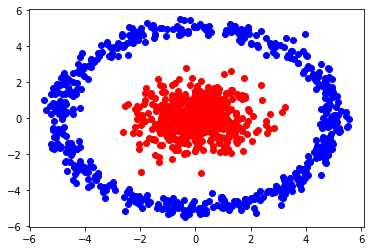

In [3]:
plt.plot(x,y,'ro')
plt.plot(x1,y1,'bo')
plt.show()

Vamos a intentar identificar las dos clases que tenemos empleando kmeans. Para ello, importamos las bibliotecas necesarias e inicializamos la clase Kmeans de scikitlearn. Como podéis comprobar, hemos escogido k=2 y el proceso de inicialización de centroides se hará de modo aleatorio. 

In [4]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=2,init='random',n_init=1,verbose=1)

A continuación convertimos a array el par de listas con las que hemos trabajado hasta este punto. 

In [6]:
x = np.array(x)

In [7]:
y = np.array(y)

In [8]:
data = np.vstack((x,y)).T

In [9]:
x1 = np.array(x1)
y1 = np.array(y1)
data1 = np.vstack((x1,y1)).T
data1 = np.concatenate((data,data1))

In [10]:
data1.shape

(1100, 2)

In [11]:
x.shape

(550,)

Representamos la columna 1 respecto a la 0.

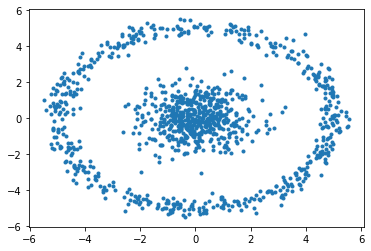

In [12]:
plt.plot(data1[:,0],data1[:,1],'.')
plt.show()

In [13]:
km.fit(data1)

Initialization complete
Iteration 0, inertia 27070.88300486674
Iteration 1, inertia 10389.563265827896
Iteration 2, inertia 10370.00442999723
Iteration 3, inertia 10360.776746768257
Iteration 4, inertia 10352.914173307558
Iteration 5, inertia 10349.549356504474
Iteration 6, inertia 10347.544742216402
Iteration 7, inertia 10344.249457723961
Iteration 8, inertia 10341.425735885436
Iteration 9, inertia 10339.014423913677
Iteration 10, inertia 10337.491786760533
Iteration 11, inertia 10336.120670076252
Iteration 12, inertia 10334.20953794895
Iteration 13, inertia 10332.926619977432
Iteration 14, inertia 10332.326483097546
Converged at iteration 14: center shift 0.00034272739289045116 within tolerance 0.0006730996085502751.


KMeans(init='random', n_clusters=2, n_init=1, verbose=1)

In [14]:
km.cluster_centers_

array([[-1.76495424,  1.05747155],
       [ 1.64374955, -1.11588355]])

In [15]:
km.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [16]:
km.labels_.shape

(1100,)

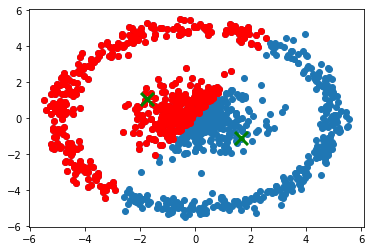

In [17]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)
plt.scatter(data1[:,0],data1[:,1])
unique_labels = set(km.labels_)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
xy = data1[km.labels_==0]
plt.scatter(xy[:,0],xy[:,1],color='r')
plt.show()


In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
single_link = AgglomerativeClustering(linkage='ward',n_clusters=2)

In [20]:
h_clusters = single_link.fit(data1)

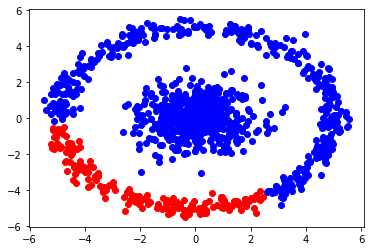

In [21]:
plt.scatter(data1[h_clusters.labels_==0,0],data1[h_clusters.labels_==0,1],color='blue')
plt.scatter(data1[h_clusters.labels_==1,0],data1[h_clusters.labels_==1,1],color='red')

In [22]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(data1, n_neighbors=30, include_self=False)

In [23]:
single_link2 = AgglomerativeClustering(linkage="ward",n_clusters=2,connectivity=connectivity)

In [24]:
h_clusters2 = single_link2.fit(data1)

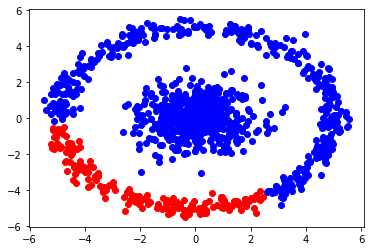

In [25]:
plt.scatter(data1[h_clusters2.labels_==0,0],data1[h_clusters2.labels_==0,1],color='blue')
plt.scatter(data1[h_clusters2.labels_==1,0],data1[h_clusters2.labels_==1,1],color='red')

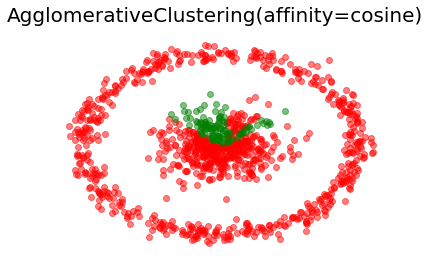

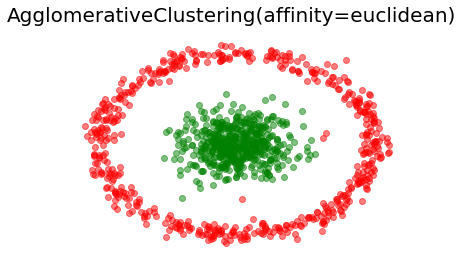

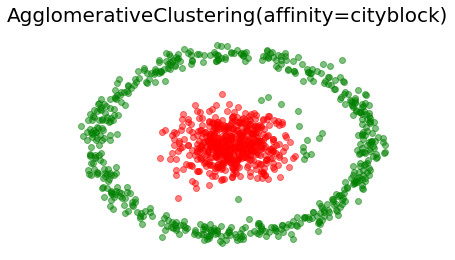

In [26]:
connectivity = kneighbors_graph(data1, n_neighbors=10, include_self=False)

for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=2,
                                    linkage="complete", affinity=metric,connectivity=connectivity)
    model.fit(data1)
    plt.figure()
    
    for l, c in zip(np.arange(model.n_clusters), 'rg'):
        plt.scatter(data1[model.labels_ == l,0],data1[model.labels_ == l,1], c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


# Vamos a probar otra manera de análisis. Para ello, vamos a expresar los puntos con notación polar. 

In [27]:
r = np.sqrt(data1[:,0]**2+data1[:,1]**2)

In [28]:
theta = np.arctan(data1[:,1]/data1[:,0])

In [29]:
data2 = np.column_stack((r,theta))

In [30]:
data2.shape

(1100, 2)

In [31]:
km.fit(data2)

Initialization complete
Iteration 0, inertia 1967.2531200835995
Iteration 1, inertia 1140.3412754850829
Iteration 2, inertia 1139.7495012393106
Converged at iteration 2: strict convergence.


KMeans(init='random', n_clusters=2, n_init=1, verbose=1)

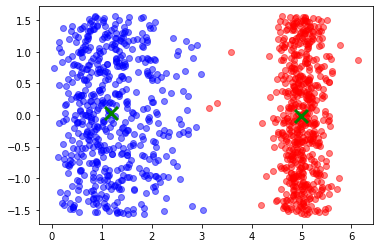

In [32]:
plt.scatter(data2[km.labels_==0,0],data2[km.labels_==0,1],color='r',alpha=0.5)
plt.scatter(data2[km.labels_==1,0],data2[km.labels_==1,1],color='b',alpha=0.5)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)


# Otro problema de kmeans viene derivado de la existencia de poblaciones con tamaños muy distinto. En el ejemplo tenemos poblaciones con distinto tamaño.

In [33]:
sizes = np.array([10,100,1000])


** Arriba hemos definido el tamaño de las tres poblaciones. A continuación se definen la media de cada población en cada uno de los ejes. **

In [34]:
avgs_x = np.array([1,4,10])
avgs_y = np.array([5,0,10])

In [35]:
import time

seed = time.time()
data3 = np.zeros(1);

for a_x,a_y,s in zip(avgs_x,avgs_y,sizes):
    cx = []
    cy = []
    for  i in range(s):
        cx.append(random.gauss(a_x,1))
        cy.append(random.gauss(a_y,1))
    cx = np.array(cx)
    cy = np.array(cy)
    aux = np.vstack((cx,cy)).T
    
    if data3.shape[0] == 1:
        data3 = aux
    else:
        data3 = np.concatenate((data3,aux))
        
data3.shape

(1110, 2)

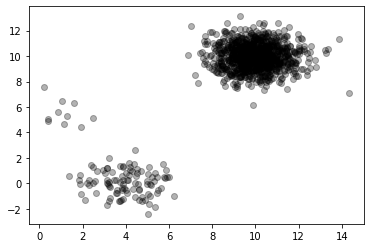

In [36]:
plt.plot(data3[:,0],data3[:,1],'ko',alpha=0.3)

In [37]:
km = KMeans(n_clusters=3,init='random',n_init=1,verbose=1)

In [38]:
km.fit(data3)
km.cluster_centers_.shape

Initialization complete
Iteration 0, inertia 14455.279191362124
Iteration 1, inertia 2905.63909579621
Iteration 2, inertia 1910.8733729564594
Converged at iteration 2: center shift 0.00026394174362659055 within tolerance 0.0006811931243851203.


(3, 2)

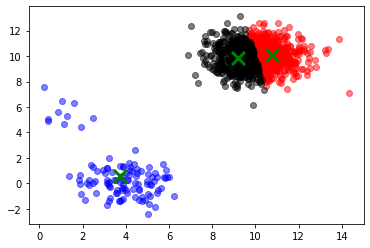

In [39]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)
plt.scatter(data3[km.labels_==0,0],data3[km.labels_==0,1],color='r',alpha=0.5)
plt.scatter(data3[km.labels_==1,0],data3[km.labels_==1,1],color='b',alpha=0.5)
plt.scatter(data3[km.labels_==2,0],data3[km.labels_==2,1],color='k',alpha=0.5)
plt.show()

En muchos casos la población con más muestras tiene asociadas dos clases, mientras que las otras dos clases son fusionadas en un único cluster.

# Vamos a usar GMM para ver si somos capaces de solucionar algunos de los problemas que hemos destacado

In [40]:
from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl

In [41]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(data1)
        bic.append(gmm.bic(data1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f84c142ff70>
Traceback (most recent call last):
  File "/home/daniel/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/daniel/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/daniel/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/daniel/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.mat

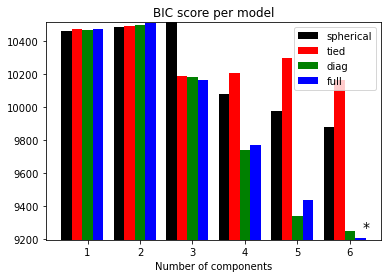

In [42]:
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
clf = best_gmm
bars = []

# Plot the BIC scores

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)


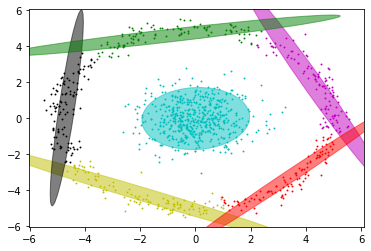

In [43]:
# Plot the winner
splot = plt.subplot(1, 1, 1)
Y_ = clf.predict(data1)
for i, (mean, covar, color) in enumerate(zip(clf.means_, clf.covariances_,
                                             color_iter)):
    #we are computing the eigenvalues of the covariance matrix: v is the sector of eigenvectors; 
    #w is the set of eigenvalues
    v, w = linalg.eigh(covar)
    
    if not np.any(Y_ == i):
        continue
    plt.scatter(data1[Y_ == i, 0], data1[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi  # convert to degrees
    v *= 4
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

## Ejercicio 2
# Repetir el conjunto de pruebas anterior  y comentar los resultados obtenidos. Habrá que entregar un notebook a modo de informe. En el informe se explicarán:

**1.-** La diferencia en los resultados al aplicar k-means con una inicialización aleatoria frente a una inicialización basada en kmeans++·

**2.-** Las limitaciones al aplicar k-means a los datasets considerados.

**3.-** Aplicación a los datasets de las técnicas de clustering jerárquico utilizadas en este ejemplo. Comparar los resultados con los obtenidos para kmeans.

**4.-** Resultados obtenidos al aplicar GMM a los datasets considerados.

**5.-** Aplicar DBSCAN a los datasets considerados y comentar los resultados obtenidos. 


## 1. Diferencia K-Means con inicialización aleatoria y K-Means++

In [44]:
def plotClusters(X, labels, title): # Plot 2d clusterig problem
    
    colors = "bgrcmykw"
    color_index = 0
    
    for cluster in np.unique(labels):
        plt.scatter(X[labels==cluster,0],
                    X[labels==cluster,1],
                    color=colors[color_index], alpha=.3)
        color_index += 1
    plt.legend([cluster for cluster in np.unique(labels)])
    plt.title(title)
    
   

In [45]:
from sklearn.cluster import KMeans

La diferencia entre una inicialización aleatoria y la inicialización k-means++ es que, en el primer caso, se escogen k puntos de manera aleatoria en el conjunto de entrenamiento. Sin emmbargo, en k-means++ se sigue una regla adicional. 

1.) Escoger un punto aleatorio $x \in X$ y añadirlo al conjunto de centroides $C \subset X$.

2.) Calcular la distancia $D(x)$ de cada punto al centroide más lejano
$$D(x) = \max_{c \in C}d(x, c)$$

3.) Calcular la probabilidad de escoger un punto como nuevo centroide segun la función de probabilidad:
$$p(x) = \frac{D^2(x)}{\sum_{x \in X-\lbrace C \rbrace}{D^2(x)}}$$

4.) Segun la función de probabilidad anterior, escoger un nuevo punto como centroide aleatoriamente y añadirlo al conjunto $C$. 

5.) Volver a 2.) hasta alcanzar el número de clusters deseado y comenzar a iterar el algoritmo de Lloyd.

Con esta inicialización "smart", los puntos que estén más alejados de los centroides tienen mayor probabilidad de ser escogidos como centroide inicial, puesto que si $D(x) > D(x')$ entonces $p(x) > p(x')$. Sigue dependiendo del primer punto escogido aleatoriamente, pero es más robusto que la inicialización completamente aleatoria, ya que a partir del primer punto se sigue un criterio de lejanía para definir los nuevos centroides iniciales. 

Con esta inicialización, si existen nubes de puntos muy alejadas del resto, es más probable que formen un cluster.

### 1.1 Pruebas con el conjunto de datos corona circular

In [46]:
Kmeans_random = KMeans(n_clusters=2, init='random')
Kmeans_plus = KMeans(n_clusters=2)

Kmeans_random.fit(data1)
Kmeans_plus.fit(data1)

KMeans(n_clusters=2)

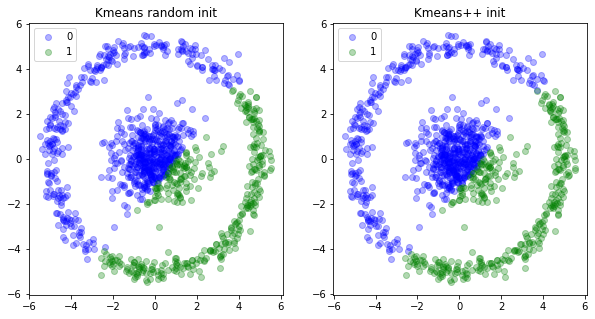

In [47]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plotClusters(data1, Kmeans_random.labels_, title='Kmeans random init')
plt.subplot(1, 2, 2)
plotClusters(data1, Kmeans_plus.labels_, title='Kmeans++ init')

### 1.2 Pruebas con el conjunto de datos coordenadas polares

In [48]:
Kmeans_random = KMeans(n_clusters=2, init='random')
Kmeans_plus = KMeans(n_clusters=2)

Kmeans_random.fit(data2)
Kmeans_plus.fit(data2)

KMeans(n_clusters=2)

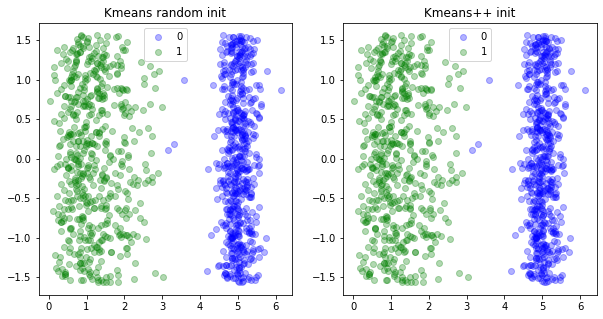

In [49]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plotClusters(data2, Kmeans_random.labels_, title='Kmeans random init')
plt.subplot(1, 2, 2)
plotClusters(data2, Kmeans_plus.labels_, title='Kmeans++ init')

### 1.3 Pruebas con el conjunto de datos con tamaño de poblaciones desbalanceado

In [50]:
Kmeans_random = KMeans(n_clusters=3, init='random')
Kmeans_plus = KMeans(n_clusters=3)

Kmeans_random.fit(data3)
Kmeans_plus.fit(data3)

KMeans(n_clusters=3)

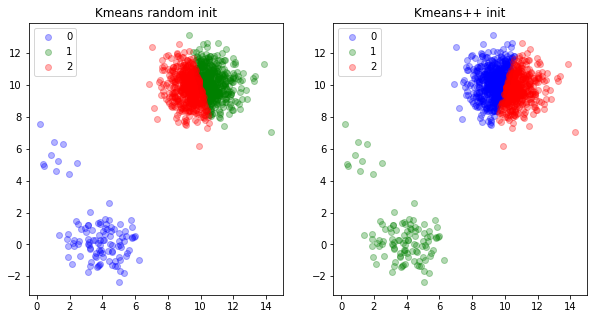

In [51]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plotClusters(data3, Kmeans_random.labels_, title='Kmeans random init')
plt.subplot(1, 2, 2)
plotClusters(data3, Kmeans_plus.labels_, title='Kmeans++ init')

## 2. Las limitaciones al aplicar k-means a los datasets considerados.

Como se ve, ninguno de los métodos anteriores es capaz de clusterizar, al menos, como lo haría el ojo humano en las siguientes situaciones:

* Nubes de puntos con patrones geométricos distintos a una bola abierta, como es el caso de las coronas circulares.
* Nubes de puntos con tamaños muy desbalanceados. Esto se debe a que el algoritmo usa la distancia promedio de un punto a los centros como medida de bondad del ajuste. Asique, la población con menor cantidad de puntos queda poco representada en esa medida de bondad, haciendo que las iteraciones muevan los centros hacia las nubes de puntos más densas.

Como se ve más adelante, los algoritmos de clustering basados en densidad de puntos pueden superar estas limitaciones aunque se incurre en otro tipo de problemas.

## 3. Aplicación a los datasets de las técnicas de clustering jerárquico utilizadas en este ejemplo. Comparar los resultados con los obtenidos para kmeans.

La idea del clustering jerarquico es que cada punto comienza siendo un cluster por sí mismo. En cada iteración se unen los clusters que esten más cercanos. Se considera que el método ha terminado cuando todos los puntos están en el mismo cluster. 

La forma de determinar si dos clusters "son cercanos" es mediante alguna distancia que se conoce como función linkage.

Existen varios tipos de función linkage comunes en la literatura:

* Single-link: Se basa en medir la distancia más corta entre un punto cualquiera de un cluster y otro punto cualquiera del otro cluster. Es decir, la distancia más pequeña entre dos puntos de manera que cada extremo este en un cluster distinto. En este sentido, dos clusters estan alejados si sus dos puntos más cercanos estan a una distancia grande.

* Complete-link: Se basa en medir la distancia mas grande entre un punto cualquiera de un cluster y otro punto cualquiera del otro cluster. Es decir, la distancia más grande entre dos puntos de manera que cada extremo este en un cluster distinto. En este sentido, dos clusters estan alejados si sus dos puntos más lejanos estan a una distancia grande.

* Average-link: Se basa en medir la distancia media entre un punto cualquiera de un cluster y otro punto cualquiera del otro cluster. Es decir, la distancia promedio entre dos puntos de manera que cada extremo este en un cluster distinto. En este sentido, dos clusters estan alejados si la distancia promedio entre un par cualquiera de puntos es grande.

<img src="links.png">

In [52]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
def CompareAgglomerativeClustering(data, n_clusters):

    modelComplete = AgglomerativeClustering(distance_threshold=None, n_clusters=n_clusters, linkage='complete')
    modelSingle = AgglomerativeClustering(distance_threshold=None, n_clusters=n_clusters, linkage='single')
    modelAvg = AgglomerativeClustering(distance_threshold=None, n_clusters=n_clusters, linkage='average')

    modelComplete.fit(data)
    modelSingle.fit(data)
    modelAvg.fit(data)
    
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plotClusters(data, modelComplete.labels_, title='Agglomerative Clustering - Complete')
    plt.subplot(1, 3, 2)
    plotClusters(data, modelSingle.labels_, title='Agglomerative Clustering - Single')
    plt.subplot(1, 3, 3)
    plotClusters(data, modelAvg.labels_, title='Agglomerative Clustering - Avg')

### 3.1 Ajuste sobre la corona

In [53]:
modelComplete = AgglomerativeClustering(distance_threshold=None, n_clusters=2, linkage='complete')
modelSingle = AgglomerativeClustering(distance_threshold=None, n_clusters=2, linkage='single')
modelAvg = AgglomerativeClustering(distance_threshold=None, n_clusters=2, linkage='average')

modelComplete.fit(data1)
modelSingle.fit(data1)
modelAvg.fit(data1)

AgglomerativeClustering(linkage='average')

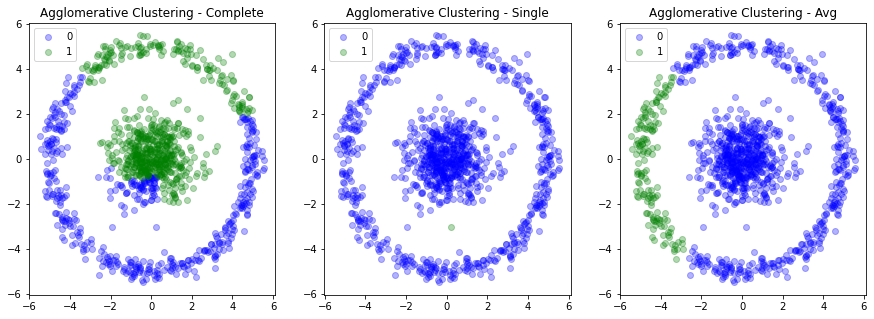

In [54]:
CompareAgglomerativeClustering(data1, n_clusters=2)

En esta prueba se ve que el único método que es capaz de clusterizar como el ojo humano es el método Single. A continuación se intenta dar una justificación intuitiva de cada resultado:

1.) la distancia mínima entre dos puntos de dos clusters lleva a una separación simétrica del conjunto, ya que este método funciona bien cuando los clusters son bolas densas aisladas.

2.) la máxima distancia entre los dos clusters lleva a una correcta separacción, ya que los puntos del centro son muy densos y dan una distancia máxima a la corona muy grande por lo que nunca se llegan a unir dos clusters con uno situado en la corona y otro en el centro.

3.) La distancia promedio lleva casi a un único cluster. Esto se debe a que en promedio, los puntos del centro estan igual de cerca a los de la corona.

<img src="clusters.png">

### 3.2 Ajuste sobre las coordenadas polares

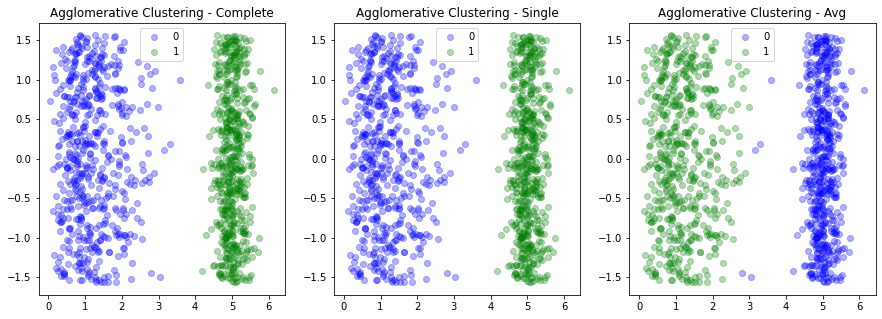

In [55]:
CompareAgglomerativeClustering(data2, n_clusters=2)


En este caso al tratarse de nubes globulares separadas, todos actuan bien.

### 3.3 Ajuste sobre nubes poco densas

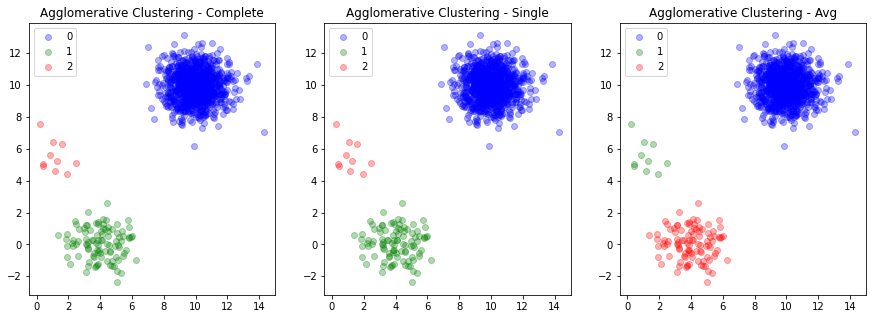

In [56]:
CompareAgglomerativeClustering(data3, n_clusters=3)


Se ve que en problemas desbalanceados estos metodos actuan bien, ya que los puntos estan muy alejados del resto. Por tanto, sera de los ultimos clusters en unirse al resto de puntos.

# 4. Resultados obtenidos al aplicar GMM a los datasets considerados.

Las mezclas gaussianas se basan en ajustar distribuciones normales sobre nubes de puntos para justificar su unión. Para estimar la media y matriz de covarianza de las distribuciones que pueden estar generando las nubes de puntos, se usa el algoritmo EM. 

In [57]:
from sklearn.mixture import GaussianMixture

In [70]:
def CompareGMMClustering(data, n_clusters, covariance_type):
    
    for n in range(2, n_clusters+1):
        GMM = GaussianMixture(n_components=n, covariance_type=covariance_type)
        GMM.fit(data)

        plt.figure(figsize=(20, 5))
        plotClusters(data, GMM.predict(data), title=f'GMM - CLuster: {n} - Cov: {covariance_type}')

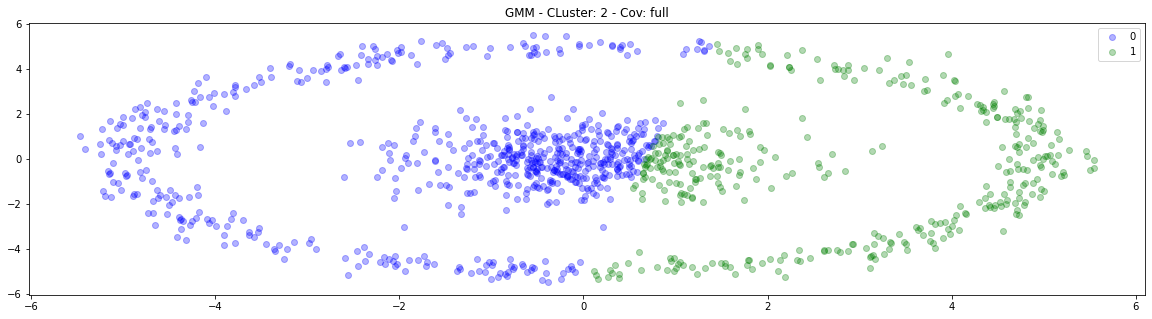

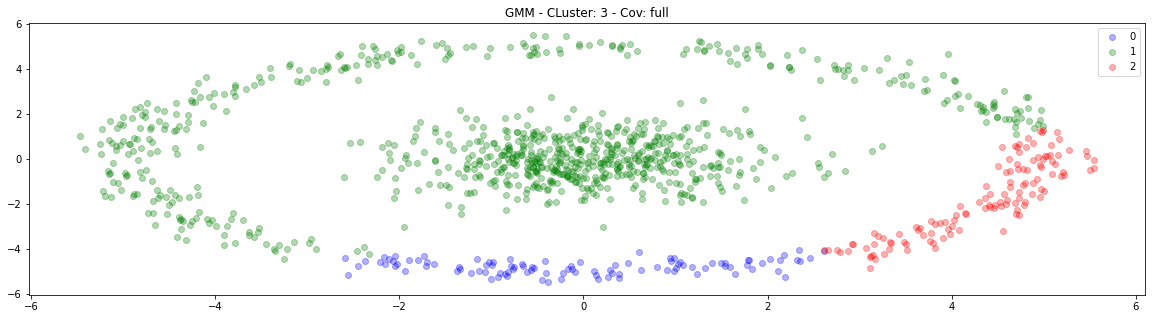

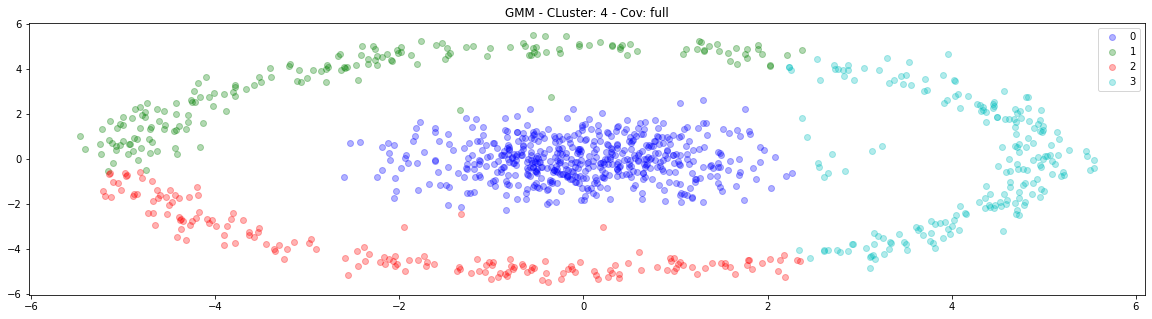

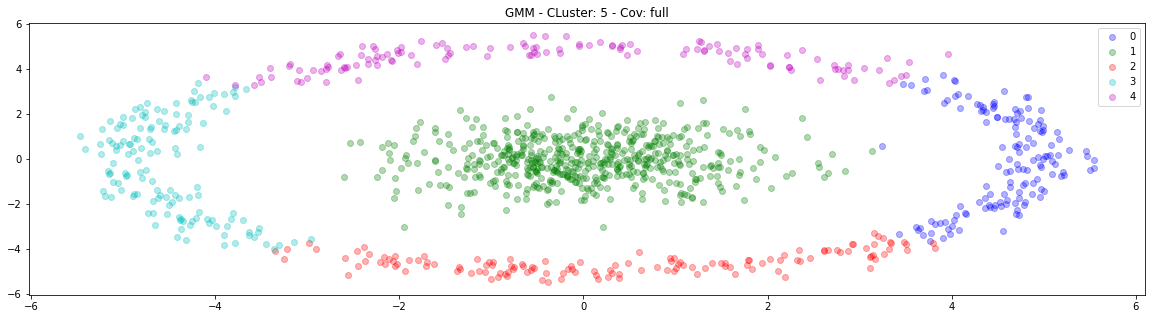

In [75]:
CompareGMMClustering(data1, 5, covariance_type='full')

Intuitivamente, GMM trata de encontrar distribuciones normales, pero la corona es un patron que no se genera mediante una distribución normal. Luego el algoritmo no es capaz de encontrar la solución.

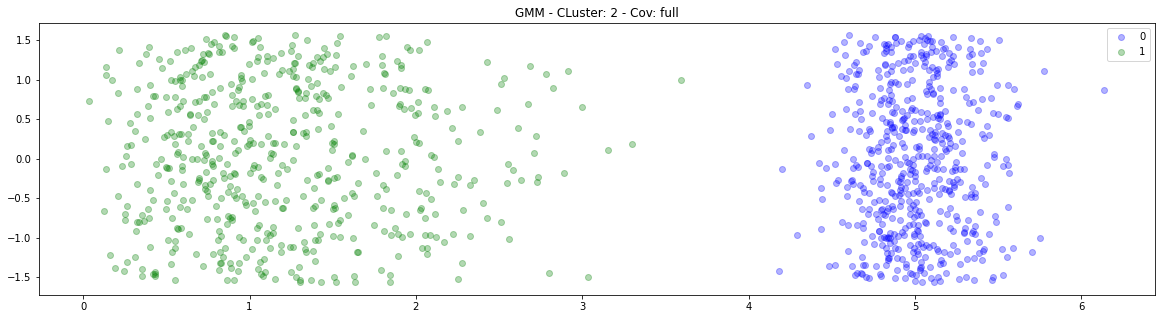

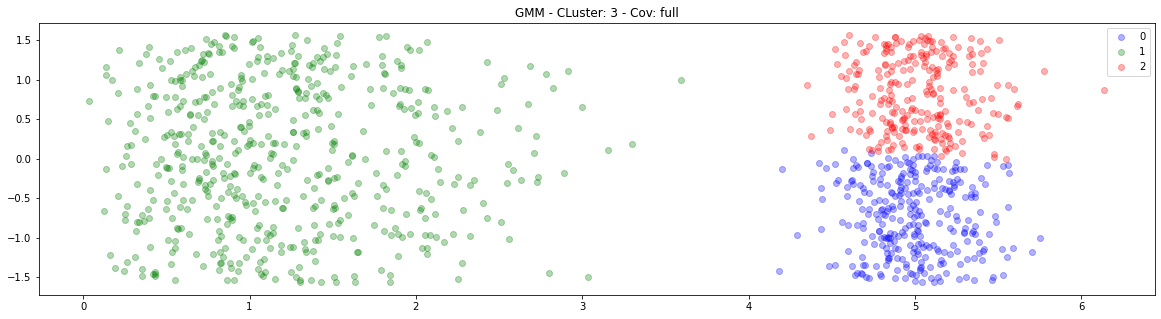

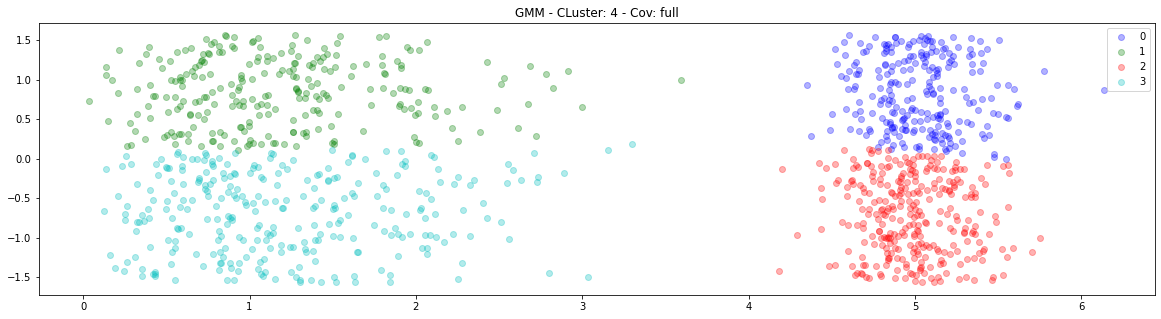

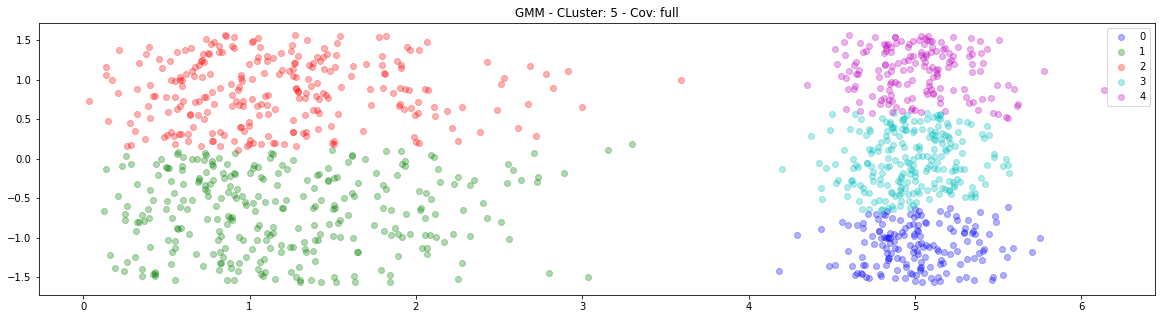

In [76]:
CompareGMMClustering(data2, 5, covariance_type='full')

Se ve que las mexclas gaussianas separan bien conjuntos globulares

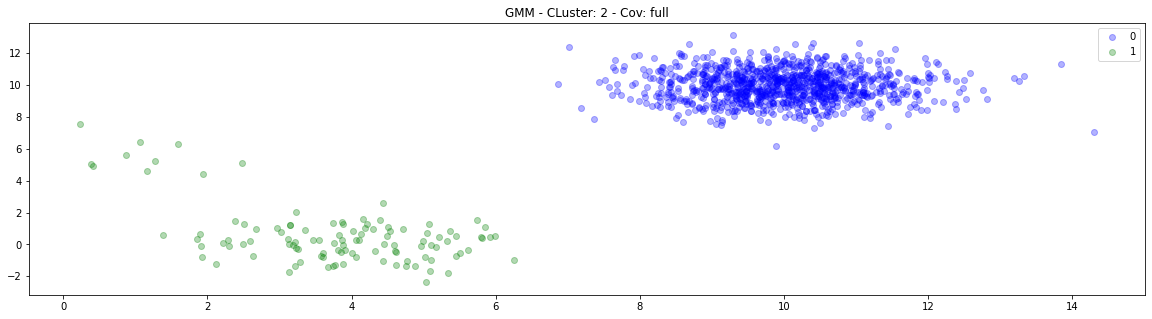

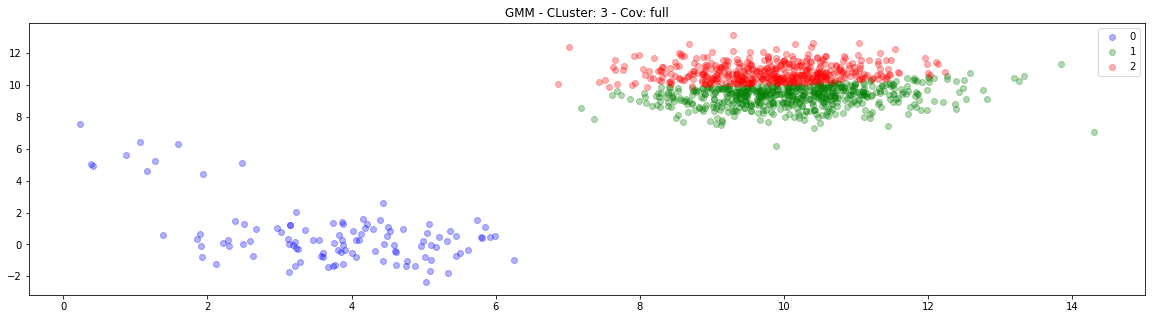

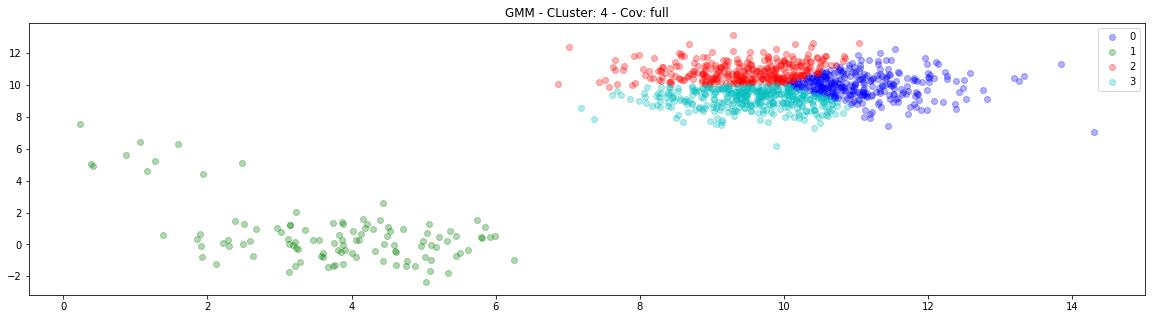

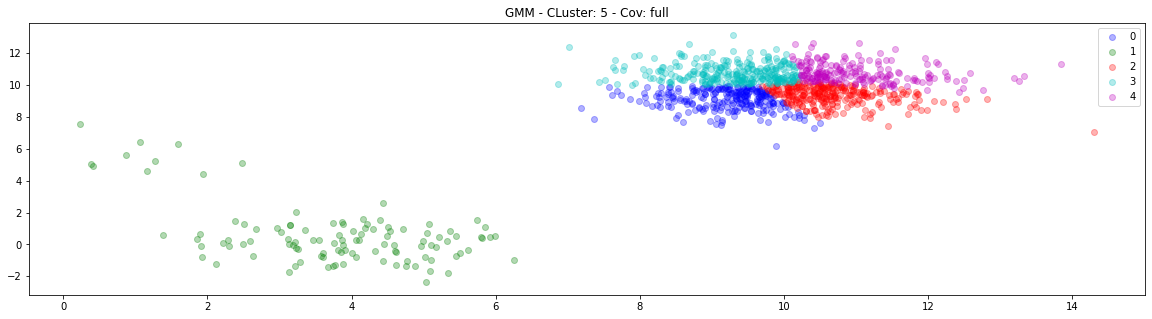

In [77]:
CompareGMMClustering(data3, 5, covariance_type='full')

Se ve que las mezclas gaussianas tienen problemas para clusterizar nubes de puntos poco densas. Esto se debe a que el tamaño muestral para estimar un kernel de una normal es muy pequeño.